In [34]:
import pandas as pd
import numpy as np
import os
import pickle

from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
import scripts.functions as fn 
from scripts.indicators import supertrend, volume_level

C:\Users\lbisa\Mi unidad (leonardo.bisaro@gmail.com)\Cripto\python\InvestingEvolution\ie\www


In [35]:
#klines_file = './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file  = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Lateral_BTCUSDT_0m01_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/0m05/Lateral_BTCUSDT_0m05_2023-06-20_2023-10-09.DataFrame'
klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
#klines_file  = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/1h01/Lateral_BTCUSDT_1h01_2023-06-20_2023-10-09.DataFrame'
#klines_file  = './backtest/klines/1h04/Completo_BTCUSDT_1h04_2021-01-01_2023-07-31.DataFrame'

#klines_file = './backtest/klines/1h04/Bajista_BTCUSDT_1h04_2021-04-12_2021-07-12.DataFrame'
with open(klines_file, 'rb') as file:
    df = pickle.load(file)
    #data.set_index('datetime',inplace=True)


#Volume Level

<Axes: >

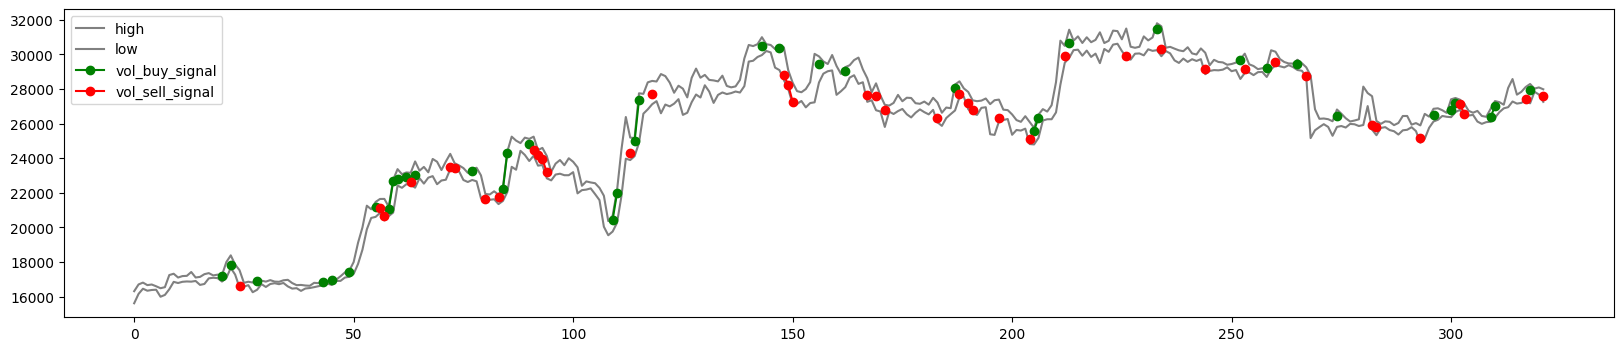

In [40]:
"""
vol_period = 21
thresholdExtraHigh = 3
thresholdHigh = 1.5
thresholdMedium = 0.2
thresholdNormal = -0.5

df['vol_mean'] = df['volume'].rolling(window=vol_period).mean()
df['vol_std']  = df['volume'].rolling(window=vol_period).std()
df['vol_eh'] = df['vol_std'] * thresholdExtraHigh + df['vol_mean']
df['vol_h'] = df['vol_std'] * thresholdHigh + df['vol_mean']
df['vol_m'] = df['vol_std'] * thresholdMedium + df['vol_mean']
df['vol_n'] = df['vol_std'] * thresholdNormal + df['vol_mean']

#El volumen debe estar entre medio (vol_m) y alto (vol_h)
df['status_vol'] = np.where((df['volume']>df['vol_m']) & (df['volume']<df['vol_h']),df['volume'],None)

"""
df = volume_level(df,period=21)
df['vol_buy_signal'] = np.where(df['vol_signal']==1,df['close'],None)
df['vol_sell_signal'] = np.where(df['vol_signal']==-1,df['close'],None)
df[['high','low','vol_buy_signal','vol_sell_signal']].plot(figsize=(20,4),style=['gray','gray','g-o','r-o'])

#Supertrend

In [37]:
df = supertrend(df,length=7,multiplier=3)


#Analisis de puntos de entrada

<Axes: >

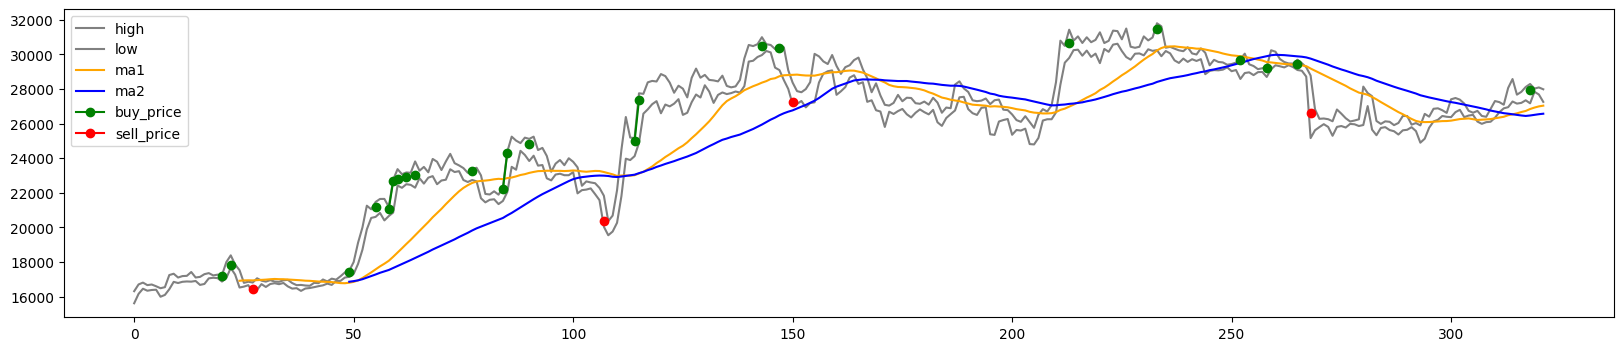

In [41]:
df['buy_price'] = np.where( (df['vol_signal']>0) & (df['st_trend']>0) , df['close'] , None )
df['sell_price'] = np.where( (df['st_trigger']<0) , df['close'] , None )
df['ma1'] = df['close'].rolling(window=25).mean()
df['ma2'] = df['close'].rolling(window=50).mean()

df[['high','low','ma1','ma2','buy_price','sell_price']].plot(figsize=(20,4),style=['gray','gray','orange','blue','g-o','r-o'])
